<a href="https://colab.research.google.com/github/zainali60/Deep-learning/blob/main/MNIST_EXAMPLE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'2.5.0'

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
print(test_images.shape)
print(test_labels.shape)


(10000, 28, 28)
(10000,)


In [7]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
train_images[0].shape

(28, 28)

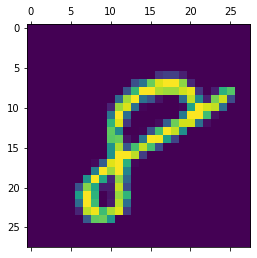

In [11]:
plt.matshow(train_images[59999])

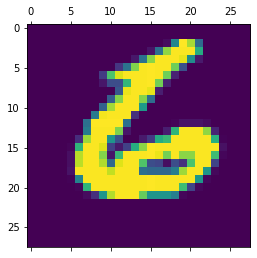

In [12]:
plt.matshow(test_images[9999])

In [13]:
train_labels[0]

5

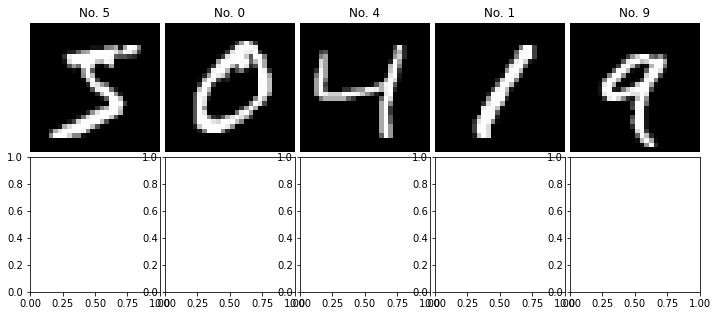

In [14]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
gridspec_kw={'wspace':0.04, 'hspace':0.01},
squeeze=True)
for r in range(num_rows):
  for c in range(num_cols):

    image_index = r * 5 + c
    ax[r,c].axis("off")
    ax[r,c].imshow(train_images[image_index], cmap='gray')
    ax[r,c].set_title('No. %d' % train_labels[image_index])
  plt.show()
  plt.close()

In [15]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
train_images = train_images.reshape(len(train_images), 28 * 28)
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(len(test_images), 28 * 28)
test_images = test_images.astype('float32') / 255

In [18]:
import keras
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 12s 3ms/step - loss: 0.4346 - accuracy: 0.8745
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1124 - accuracy: 0.9672
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9814
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9893


In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9789


In [22]:
test_predicted = network.predict(test_images)
test_predicted[1]

array([3.1564126e-11, 2.3796799e-06, 9.9999714e-01, 4.6297478e-07,
       4.3050473e-19, 8.9306527e-09, 1.5455009e-10, 1.2852805e-16,
       3.5726938e-08, 1.5722751e-14], dtype=float32)

In [23]:
np.argmax(test_predicted[1])

2